
------------Q1------------

The average fare by sex is as follows:

|     Sex  |     Fare  |
|----------|-----------|
|  Female  |  43.47    |
|    Male  |  24.56    |
has_plots - False
has_changes_to_df - False

------------Q2------------

I have created a bar chart displaying the average age by passenger class (Pclass). The chart effectively illustrates the relationship between the passenger class and the average age of passengers. If you have any further requests or need additional insights, feel free to ask!
has_plots - True
has_changes_to_df - False


<string>:28: UserWarning: FixedFormatter should only be used together with FixedLocator


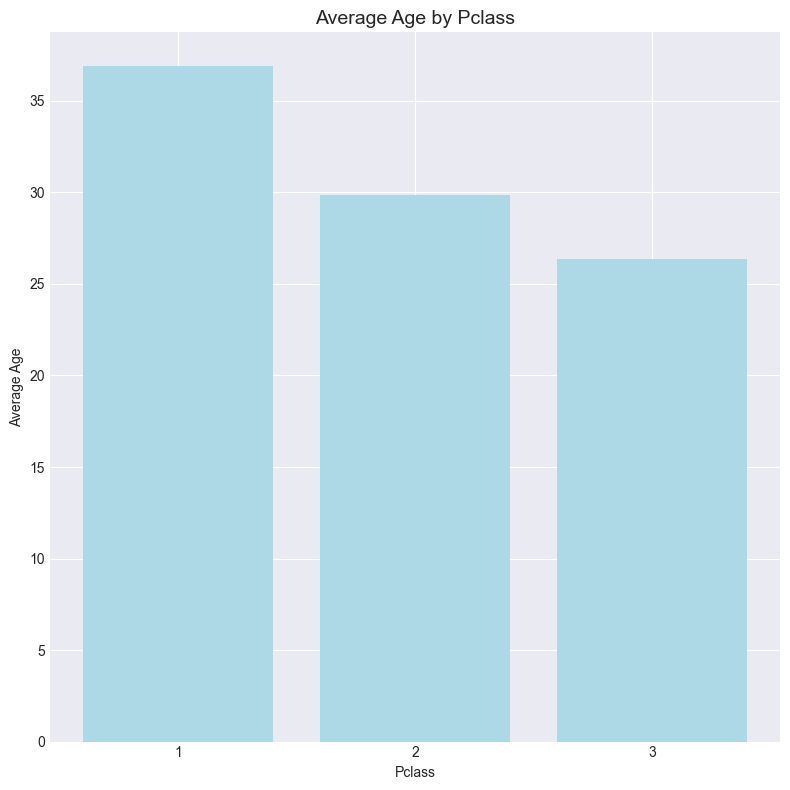

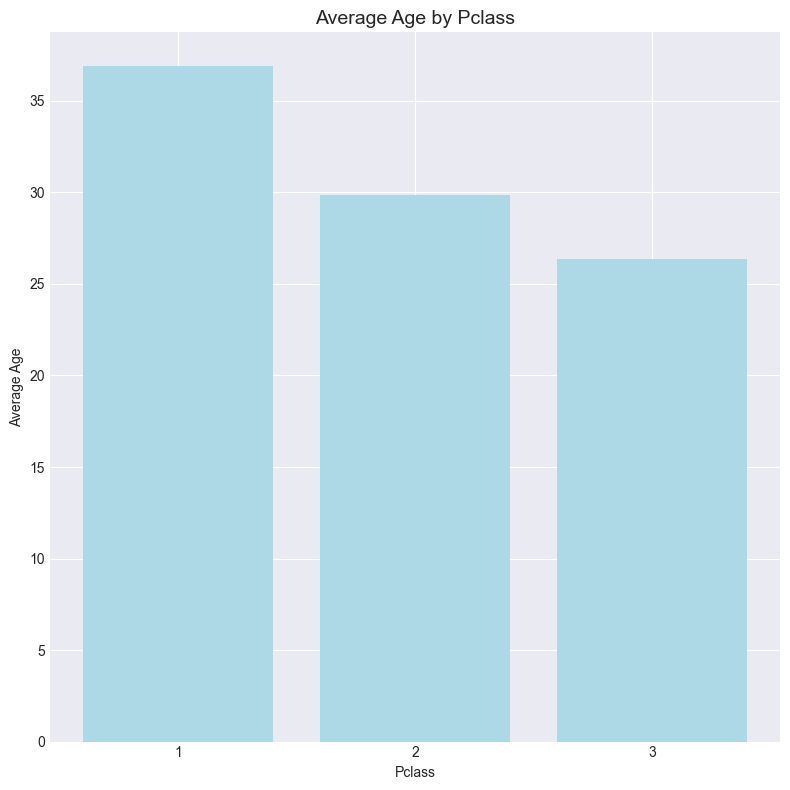


------------Q3------------

I have successfully created a new column called `age_over_30` in the dataframe. This column indicates whether the age of each passenger is over 30, with valid entries being 'yes' or 'no'. 

Here are the first few entries of the updated dataframe:

|   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin         | Embarked    | age_over_30 |
|--------------:|-----------:|---------:|:----------------------------------------------------|:-------|------:|--------:|--------:|:-----------------|--------:|:--------------|:------------|:------------|
|             1 |          0 |        3 | Braund, Mr. Owen Harris                             | Male   |    22 |       1 |       0 | A/5 21171        |  7.25   | Not Specified | Southampton | no          |
|             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | Female | 

In [27]:
import os
import pandas as pd
from smartdata import SmartData
from dotenv import load_dotenv
from matplotlib import pyplot as plt

load_dotenv()
os.getenv('OPENAI_API_KEY')

# Or Set OpenAI API key here :)
# os.environ["OPENAI_API_KEY"] = "Your openai key"

# Load sample data
df_clean = pd.read_csv(r"https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv", index_col=0)

# Initialize SmartData Model to clean up data
sd_clean = SmartData(df_list=df_clean, memory_size=0, show_detail=False)
prompt, sd_model = sd_clean.create_model()
summary, has_changes_to_df, df_new = sd_clean.clean_data()

# Initialize SmartData Model with memory for the last 3 conversations and detailed outputs
# Load in cleaned data
smartdata_qa = SmartData(df_list=df_new, memory_size=3, show_detail=False)
qa_prompt, qa_model = smartdata_qa.create_model()

# Start Q&A session -------------------------------------------------

# Output Explanation:
# answer: The response to your question, formatted in markdown.
# has_plots: Boolean indicating if a chart was generated.
# has_changes_to_df: Boolean indicating if the dataframe was updated.
# image_fig_list: List of matplotlib figures (if has_plots is True).
# df_new: Updated dataframe (if has_changes_to_df is True); otherwise, a copy of the original dataframe.
# response: Detailed output of all intermediate steps generated by the model.
# code_list_plot_with_add_on: Python code to generate the figures in image_fig_list.
# code_list_datachange_with_add_on: Python code to apply the dataframe updates resulting in df_new.

# Q1 - General analytics question - no charting no new dataframe
question_1 = "Please show me the average fare by sex in a table."
answer, has_plots, has_changes_to_df, image_fig_list, df_new, response, code_list, code_list_plot_with_add_on, code_list_datachange_with_add_on = smartdata_qa.run_model(question=question_1)
print("\n------------Q1------------\n")
print(answer)
print("has_plots - " + str(has_plots))
print("has_changes_to_df - " + str(has_changes_to_df))

# Q2 - Ask for making a chart
question_2 = "Please make a bar chart with average Age by Pclass."
answer, has_plots, has_changes_to_df, image_fig_list, df_new, response, code_list, code_list_plot_with_add_on, code_list_datachange_with_add_on = smartdata_qa.run_model(question=question_2)
print("\n------------Q2------------\n")
print(answer)
print("has_plots - " + str(has_plots))
print("has_changes_to_df - " + str(has_changes_to_df))
for fig in image_fig_list:
    plt.show(fig)

# Q3 - Ask for data transformation
question_3 = "Can you create a new column called age over 30, valid entries are yes or no."
answer, has_plots, has_changes_to_df, image_fig_list, df_new, response, code_list, code_list_plot_with_add_on, code_list_datachange_with_add_on = smartdata_qa.run_model(question=question_3)
print("\n------------Q3------------\n")
print(answer)
print("has_plots - " + str(has_plots))
print("has_changes_to_df - " + str(has_changes_to_df))
print(df_new.head(3))

# Q4 - Chat with memory
question_4 = "Can you delete the new column you just created?"
answer, has_plots, has_changes_to_df, image_fig_list, df_new, response, code_list, code_list_plot_with_add_on, code_list_datachange_with_add_on = smartdata_qa.run_model(question=question_4)
print("\n------------Q4------------\n")
print(answer)
print("has_plots - " + str(has_plots))
print("has_changes_to_df - " + str(has_changes_to_df))
print(df_new.head(3))